# Assignment problem solver
#### Laurent Lessard

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import linear_sum_assignment
import seaborn as sns
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
"""
Input is a m x n array of (concepts) x (colors) filled with association ratings
Output is a list of length m with the index of the color that should be associated with each concept
"""
def assignment_solve( ratings, method="balanced" ):
    m,n = ratings.shape
    assert m <= n, "More concepts than colors, assignment impossible!"
    
    # isolated merit function (only considers target in isolation)
    if method == "isolated":
        merit_matrix = ratings
    
    # balanced merit function (balances ratings of target vs off-target objects with each color)
    elif method == "balanced":
        t = 1  # this is the penalty parameter. t=1 for balanced, t=0 recovers isolated case.
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = ratings[i,j] - t*ratings[np.arange(m)!=i,j].max()
    
    # baseline merit function (uniformly bad assignment)
    elif method == "baseline":
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = -abs( ratings[i,j] - ratings[np.arange(m)!=i,j].max() )
                
    else:
        assert False, "unknown method in assignment problem"
        
    row_ind, col_ind = linear_sum_assignment( merit_matrix, maximize=True )
    return col_ind


## Examples

In [3]:
# 3 object and 5 colors
A = np.array( [[ 1, 4, 6, 2, 5 ],
               [ 2, 1, 4, 5, 7 ],
               [ 4, 2, 9, 2, 1 ]] )

In [4]:
"""
ISOLATED METHOD:
The max for each row is (6,7,9) but this can't work because the first row's 6
conflicts with the third row's 9. The best option is to pick 4 from the first
row, so the optimal sum is 4+7+9.
"""
print( assignment_solve(A, method="isolated") )

[1 4 2]


In [5]:
"""
BALANCED METHOD:
This method compares each number to the largest other number in its column and
tries to maximize this difference. The assignment 4+7+9 is problematic because
the 7 is only 2 away from the 5 above it. By picking 5 instead for the second
row, we increase this distance to 3. So the assignment is less confusable.
"""
print( assignment_solve(A, method="balanced") )

[1 3 2]


In [6]:
"""
BASELINE METHOD:
This method maximizes confusability. By picking (4,7,4) from first,second,third
rows, we get items that are all exactly +2 larger than the other choices in their
respective columns. So all items are equally likely to be mis-assigned.
"""
print( assignment_solve(A, method="baseline") )

[4 0 1]


In [7]:
print(scipy.__version__)

1.6.1


In [8]:
p = pd.read_csv('../data/ratings_matrix.csv')

### read in datafiles

d = pd.read_csv('../data/uw_71_ratings_matrix.csv')

#d = pd.read_csv('../data/colorabilty_ratings_matrix.csv')

d = d.rename(columns={"Unnamed: 0": "concept"})
#p = p.rename(columns={"Unnamed: 0": "concept"})

FileNotFoundError: [Errno 2] No such file or directory: '../data/uw_71_ratings_matrix.csv'

In [ ]:
#d=p

In [ ]:
## Get only ratings columns
ratings_cols = d.columns[1:]
ratings_arr = np.array(d[ratings_cols])


## compute p_ij
ratings_arr = ratings_arr/ratings_arr.sum(axis=0)

## compute -p_ij*logp
def compute_ent(array):
    logs= []
    for i,a in enumerate(array):
        if array[i]==0:
            logs.append(0)
        else:
            logs.append(math.log(array[i]))
    out = -array*np.array(logs)
    return out

ent_arr = np.apply_along_axis(compute_ent, 1, ratings_arr)

## compute entropy per color
H_n = ent_arr.sum(axis=0)

## get worst and best colors

worst_color_inds = (-H_n).argsort()[:20]+1
best_color_inds = (H_n).argsort()[:20]+1


## Solve Assignment inference

In [ ]:
d

In [ ]:
# cluster_1 = ['blueberry','ocean','sky','beach']
# cluster_2 = ['sunset','mango','watermelon','strawberry']
# cluster_3 = ['day','noon','happy','above']
# cluster_4 = ['fearful','angry','disgust','night']
# cluster_5 = ['far','below','dusk','sad']

In [ ]:
cluster_1 = ['speed','reliability','comfort','safety','efficiency']
cluster_2 = ['apple','cherry','grape','peach','banana']
cluster_3 = ['driving','sleeping','eating','working','leisure']
cluster_4 = ['carrot','celery','corn','eggplant','mushroom']

clusters = [cluster_1, cluster_2, cluster_3, cluster_4]
p_clust = ['blueberry','mango','strawberry','watermelon','lemon']

In [9]:
color_dict = pd.read_csv('../data/uw_71_color_dict.csv')
#color_dict = pd.read_csv('../data/colorability_color_dict.csv')
#color_dict = pd.read_csv('../data/color_dict.csv')
color_dict=color_dict.drop(columns='Unnamed: 0')
color_dict=color_dict.rename(columns={"index": "ind"})
color_dict


FileNotFoundError: [Errno 2] No such file or directory: '../data/uw_71_color_dict.csv'

## UW 71

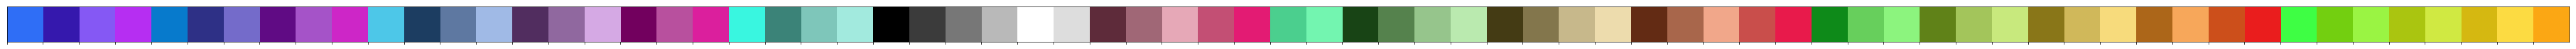

In [15]:
sns.palplot(color_dict.sort_values(by=['ind']).hex.tolist())



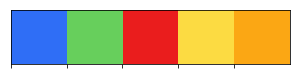

In [16]:
sns.palplot(color_dict[color_dict.ind.isin([1,71,70,63,52])].sort_values(by=['ind']).hex.tolist())

In [17]:
color_dict[color_dict.ind.isin([1,71,70,63,52])].sort_values(by=['ind']).hex.tolist()

['#2f6ef6', '#67cf5c', '#ea1d1d', '#fcdb42', '#fba714']

## Best Colors

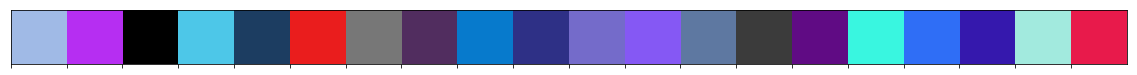

In [18]:
sns.palplot(color_dict[color_dict.ind.isin( best_color_inds)].hex.tolist())

## Worst Colors

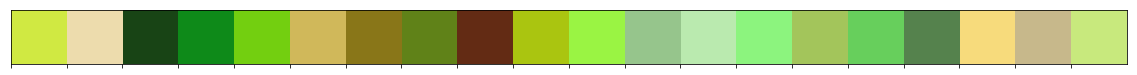

In [146]:
sns.palplot(color_dict[color_dict.ind.isin( worst_color_inds)].hex.tolist())

In [147]:
color_dict

,hex,ind
0,#d0e942,68
1,#a0bae6,14
2,#83764c,43
3,#b62ef2,4
4,#000000,25
...,...,...
66,#d5a9e4,17
67,#e81a4b,50
68,#c7b88b,44
69,#c8e97d,56


In [148]:
color_dict[color_dict.ind.isin(soln+1)].hex

NameError: name 'soln' is not defined

In [ ]:
soln

In [39]:
def display_ai1(cluster, method = 'balanced'):    ###normal assignment inference
    concepts = cluster
    method = method
    title = method
    ds = d[d.concept.isin(concepts)]
    dsa = np.array(ds.loc[:, ds.columns != 'concept'])
    soln = assignment_solve(dsa, method=method) 
    fig=plt.figure(figsize=(16,8))
    rectangle1 = plt.Rectangle((10, 10), 10, 10, fc=color_dict[color_dict.ind==soln[0]+1].hex.values[0])
    rectangle2 = plt.Rectangle((22, 10), 10, 10, fc=color_dict[color_dict.ind==soln[1]+1].hex.values[0])
    rectangle3 = plt.Rectangle((34, 10), 10, 10, fc=color_dict[color_dict.ind==soln[2]+1].hex.values[0])
    rectangle4 = plt.Rectangle((46, 10), 10, 10, fc=color_dict[color_dict.ind==soln[3]+1].hex.values[0])
    #rectangle5 = plt.Rectangle((58, 10), 10, 10, fc=color_dict[color_dict.ind==soln[4]+1].hex.values[0])

    assign_dict={}
    for i,this_sol in enumerate(soln):
        assign_dict[ds.concept.iloc[i]]=color_dict[color_dict.ind==soln[i]+1].hex.values[0]
        


    plt.gca().add_patch(rectangle1)
    plt.gca().add_patch(rectangle2)
    plt.gca().add_patch(rectangle3)
    plt.gca().add_patch(rectangle4)
    #plt.gca().add_patch(rectangle5)
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.text(13, 22, ds.concept.iloc[0], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(26, 22, ds.concept.iloc[1], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(38, 22, ds.concept.iloc[2], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(50, 22, ds.concept.iloc[3], bbox=dict(facecolor='w', alpha=0.5))
    #plt.text(62, 22, ds.concept.iloc[4], bbox=dict(facecolor='w', alpha=0.5))

    if title:
        plt.title(title,pad=80)
    ax = fig.add_subplot(1, 1, 1)
    #ax.set_title('Vertically offset title', pad=40)
    ax.set_facecolor((0.8, 0.8, 0.8))
    plt.axis('scaled')
    plt.show()
    print(assign_dict)



In [155]:
def display_ai2(cluster, method = 'balanced'):    
    concepts = cluster
    method = method
    title = 'max confusability with ' + method


    ds = d[d.concept.isin(concepts)]
    ratings_cols = ds.columns[1:]

    dsa = np.array(ds[ratings_cols])

    soln = assignment_solve(dsa, method=method) 

    ds = ds.drop(ratings_cols[soln],axis=1)

    ratings_cols = ds.columns[1:]

    ratings_arr = np.array(ds[ratings_cols])


    ## compute p_ij
    ratings_arr = ratings_arr/ratings_arr.sum(axis=0)


    ent_arr = np.apply_along_axis(compute_ent, 1, ratings_arr)

    ## compute entropy per color
    H_n = ent_arr.sum(axis=0)

    ## get worst and best colors

    worst_color_inds = (-H_n).argsort()[:5]
    best_color_inds = (H_n).argsort()[:5]

    worst_col_names = ratings_cols[worst_color_inds].tolist()

    ratings_cols_l = ratings_cols.tolist()
    worst_color_inds = np.array([i for i in range(len(ratings_cols_l)) if ratings_cols_l[i] in worst_col_names])
    #sns.palplot(color_dict[color_dict.ind.isin( worst_color_inds + 1)].hex.tolist())


    dsa = np.array(ds[ratings_cols[(worst_color_inds)]])
    
    soln = assignment_solve(dsa, method='balanced') 
    print(soln, ds[ratings_cols[(worst_color_inds)]])
    
    fig=plt.figure(figsize=(16,8))
    rectangle1 = plt.Rectangle((10, 10), 10, 10, fc=color_dict[color_dict.ind==int(worst_col_names[soln[0]].split('V')[1])].hex.values[0])
    rectangle2 = plt.Rectangle((22, 10), 10, 10, fc=color_dict[color_dict.ind==int(worst_col_names[soln[1]].split('V')[1])].hex.values[0])
    rectangle3 = plt.Rectangle((34, 10), 10, 10, fc=color_dict[color_dict.ind==int(worst_col_names[soln[2]].split('V')[1])].hex.values[0])
    rectangle4 = plt.Rectangle((46, 10), 10, 10, fc=color_dict[color_dict.ind==int(worst_col_names[soln[3]].split('V')[1])].hex.values[0])
    rectangle5 = plt.Rectangle((58, 10), 10, 10, fc=color_dict[color_dict.ind==int(worst_col_names[soln[4]].split('V')[1])].hex.values[0])


    plt.gca().add_patch(rectangle1)
    plt.gca().add_patch(rectangle2)
    plt.gca().add_patch(rectangle3)
    plt.gca().add_patch(rectangle4)
    plt.gca().add_patch(rectangle5)
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.text(13, 22, ds.concept.iloc[0], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(26, 22, ds.concept.iloc[1], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(38, 22, ds.concept.iloc[2], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(50, 22, ds.concept.iloc[3], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(62, 22, ds.concept.iloc[4], bbox=dict(facecolor='w', alpha=0.5))

    if title:
        plt.title(title,pad=80)
    ax = fig.add_subplot(1, 1, 1)
    #ax.set_title('Vertically offset title', pad=40)
    ax.set_facecolor((0.8, 0.8, 0.8))
    plt.axis('scaled')
    plt.show()

In [ ]:
H_n.shape

In [156]:
display_ai1(p_clust)

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1152x576 with 0 Axes>

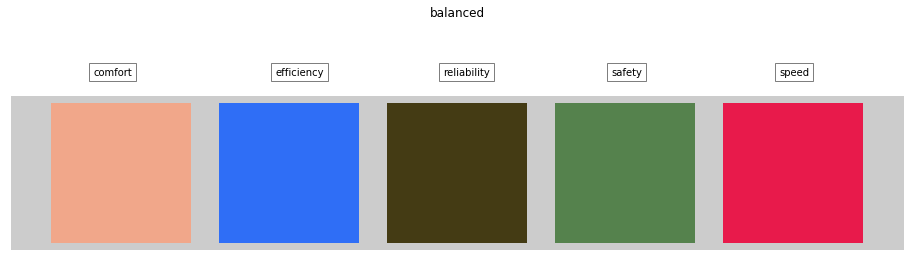

{'comfort': '#f1a78a', 'efficiency': '#2f6ef6', 'reliability': '#443b14', 'safety': '#55824d', 'speed': '#e81a4b'}


In [157]:
display_ai1(cluster_1)
#display_ai2(cluster_1)

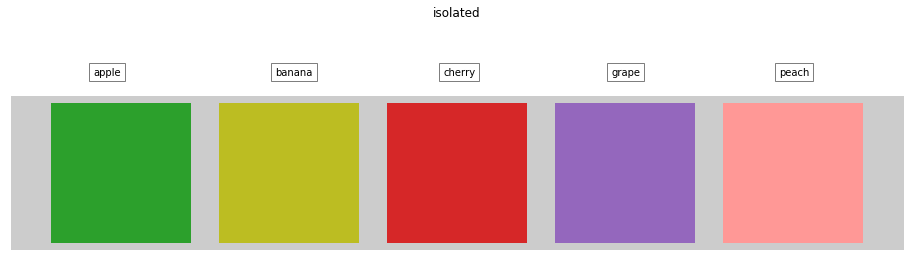

{'apple': '#2ca02c', 'banana': '#bcbd22', 'cherry': '#d62728', 'grape': '#9467bd', 'peach': '#ff9896'}


In [169]:
display_ai1(cluster_2, method ='isolated')
#display_ai2(cluster_2)

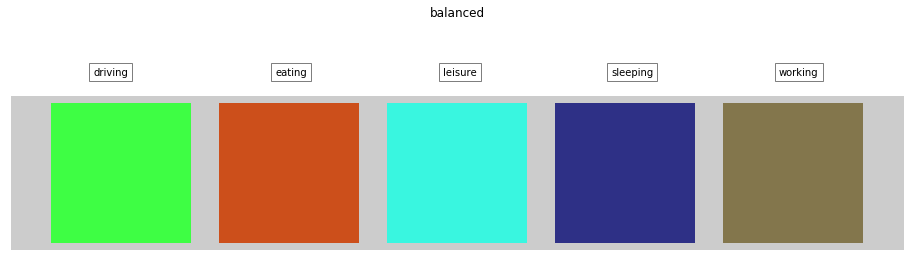

{'driving': '#3efe44', 'eating': '#cc4f1b', 'leisure': '#39f6e0', 'sleeping': '#2e3086', 'working': '#83764c'}


In [198]:
display_ai1(cluster_3)
#display_ai2(cluster_3)

In [41]:
p1 = ['grape','banana','corn','carrot']
p2 =['peach','cherry','sleeping','driving']
p3 = ['safety','comfort','sleeping','driving']
p4 = ['efficiency','speed','eggplant','celery']
p5= ['grape','banana','working','leisure']
p6 = ['peach','cherry','eggplant','celery']
p7 = ['sleeping','driving','efficiency','speed']
p8 = ['safety','comfort','corn','carrot']


plist=[p1,p2,p3,p4,p5,p6,p7,p8]

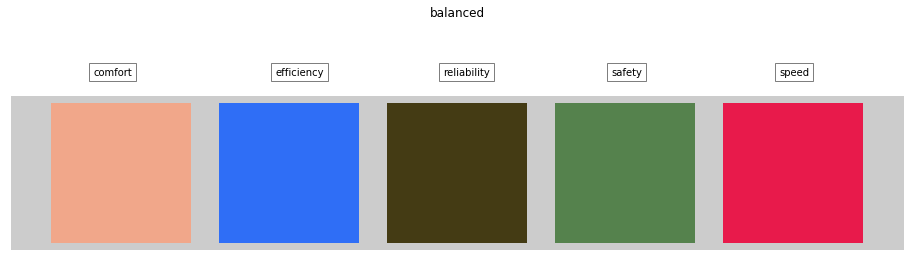

{'comfort': '#f1a78a', 'efficiency': '#2f6ef6', 'reliability': '#443b14', 'safety': '#55824d', 'speed': '#e81a4b'}


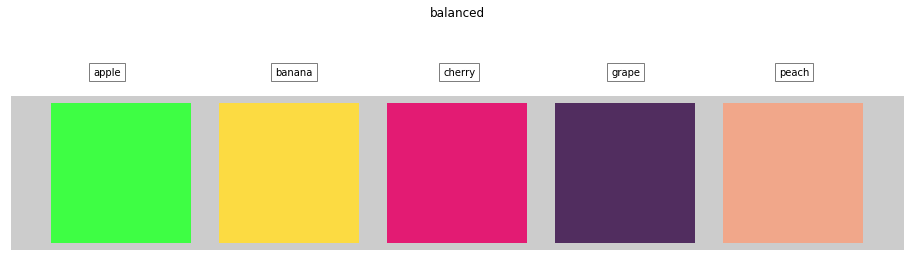

{'apple': '#3efe44', 'banana': '#fcdb42', 'cherry': '#e31b73', 'grape': '#512d5f', 'peach': '#f1a78a'}


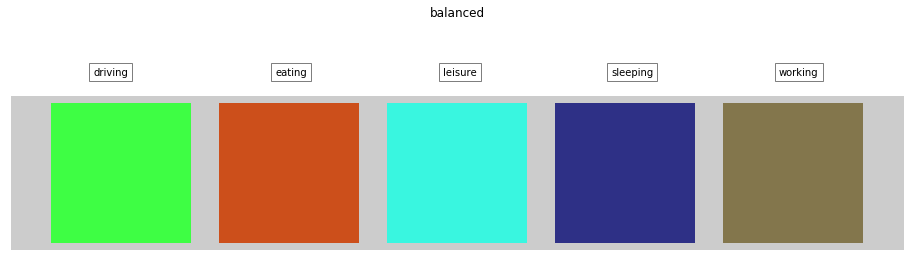

{'driving': '#3efe44', 'eating': '#cc4f1b', 'leisure': '#39f6e0', 'sleeping': '#2e3086', 'working': '#83764c'}


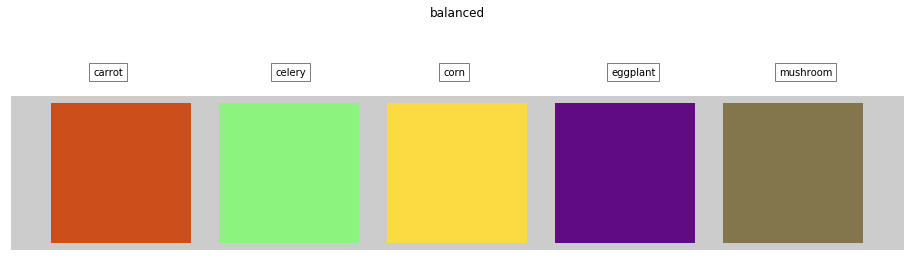

{'carrot': '#cc4f1b', 'celery': '#8cf47e', 'corn': '#fcdb42', 'eggplant': '#600b84', 'mushroom': '#83764c'}


In [25]:
for pal in clusters:
    display_ai1(pal)

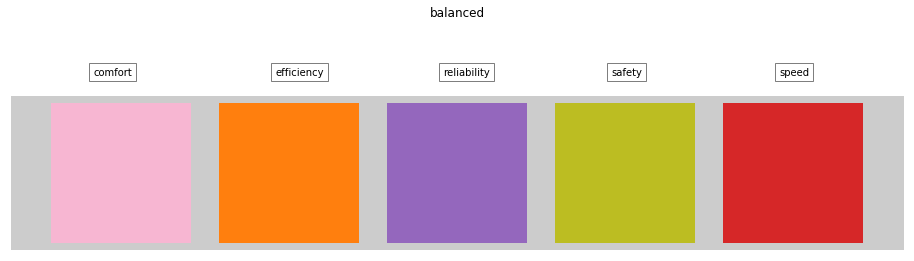

{'comfort': '#f7b6d2', 'efficiency': '#ff7f0e', 'reliability': '#9467bd', 'safety': '#bcbd22', 'speed': '#d62728'}


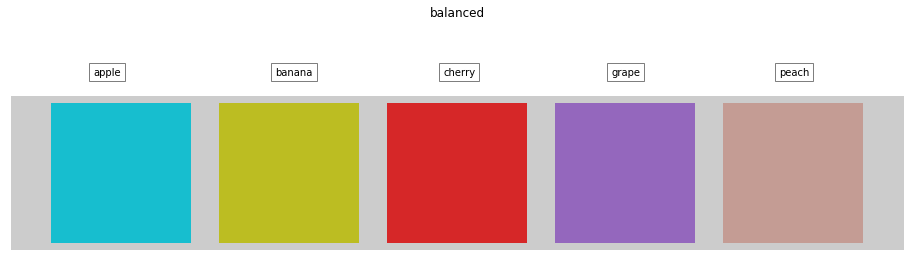

{'apple': '#17becf', 'banana': '#bcbd22', 'cherry': '#d62728', 'grape': '#9467bd', 'peach': '#c49c94'}


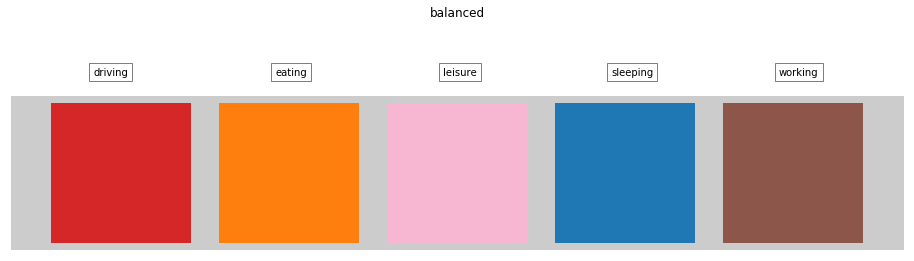

{'driving': '#d62728', 'eating': '#ff7f0e', 'leisure': '#f7b6d2', 'sleeping': '#1f77b4', 'working': '#8c564b'}


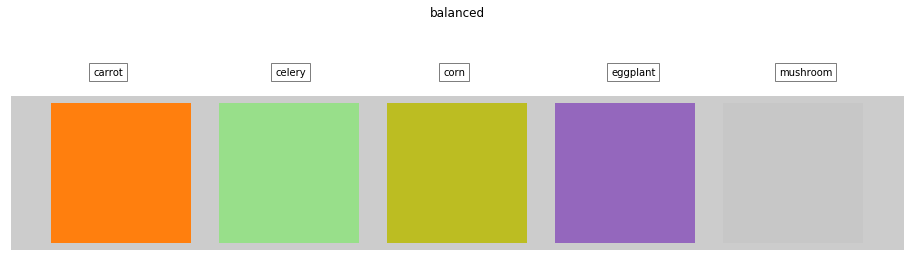

{'carrot': '#ff7f0e', 'celery': '#98df8a', 'corn': '#bcbd22', 'eggplant': '#9467bd', 'mushroom': '#c7c7c7'}


In [34]:
for pal in clusters:
    display_ai1(pal)

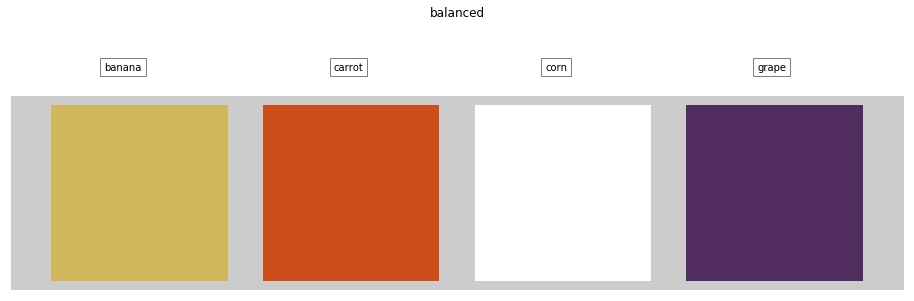

{'banana': '#d0b85a', 'carrot': '#cc4f1b', 'corn': '#ffffff', 'grape': '#512d5f'}


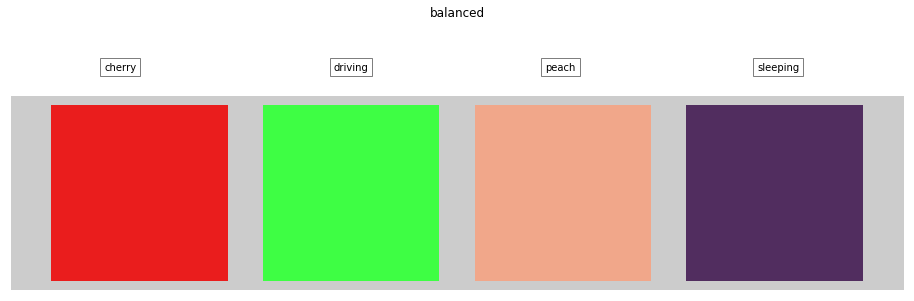

{'cherry': '#ea1d1d', 'driving': '#3efe44', 'peach': '#f1a78a', 'sleeping': '#512d5f'}


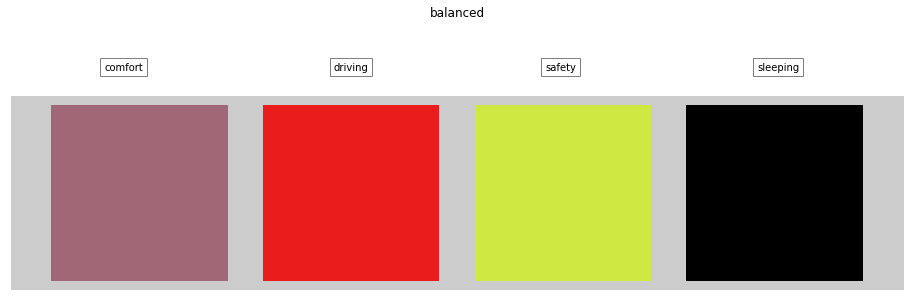

{'comfort': '#a06776', 'driving': '#ea1d1d', 'safety': '#d0e942', 'sleeping': '#000000'}


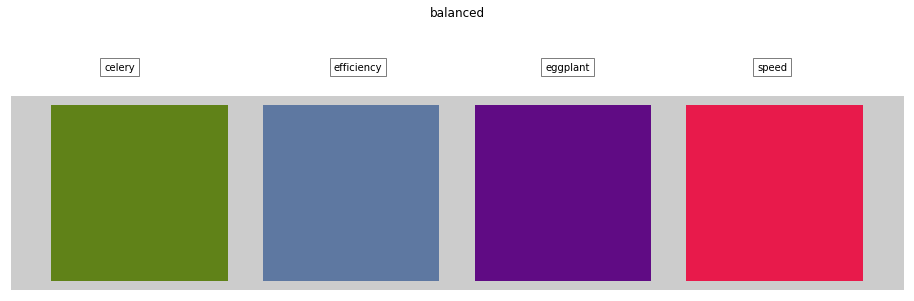

{'celery': '#608218', 'efficiency': '#5e78a1', 'eggplant': '#600b84', 'speed': '#e81a4b'}


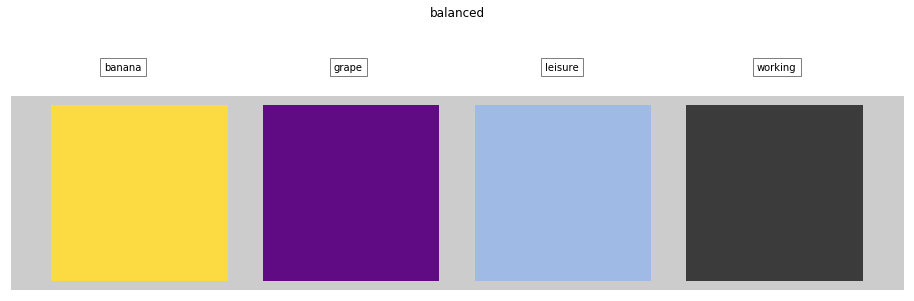

{'banana': '#fcdb42', 'grape': '#600b84', 'leisure': '#a0bae6', 'working': '#3b3b3b'}


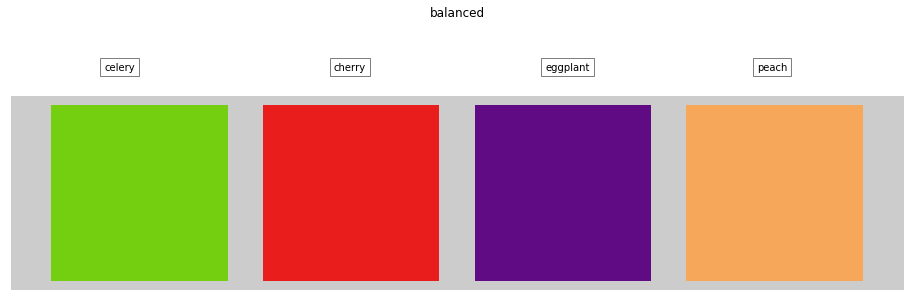

{'celery': '#73cf10', 'cherry': '#ea1d1d', 'eggplant': '#600b84', 'peach': '#f7a75a'}


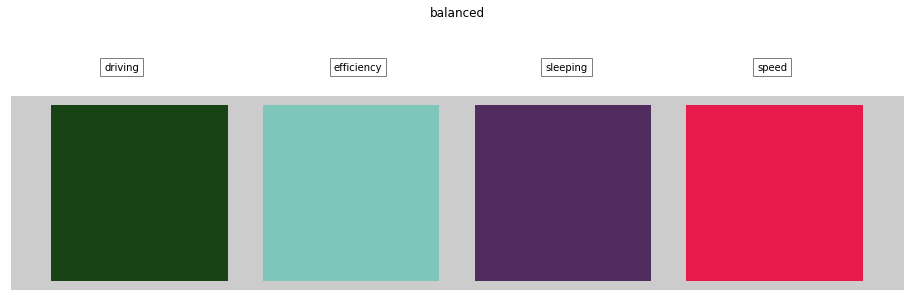

{'driving': '#184415', 'efficiency': '#7ec6ba', 'sleeping': '#512d5f', 'speed': '#e81a4b'}


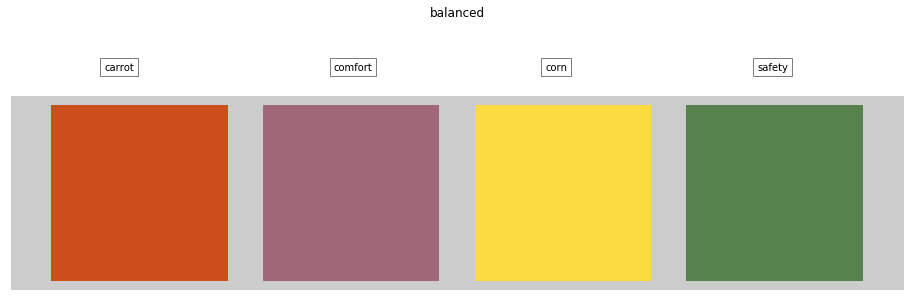

{'carrot': '#cc4f1b', 'comfort': '#a06776', 'corn': '#fcdb42', 'safety': '#55824d'}


In [42]:
for pal in plist:
    display_ai1(pal)

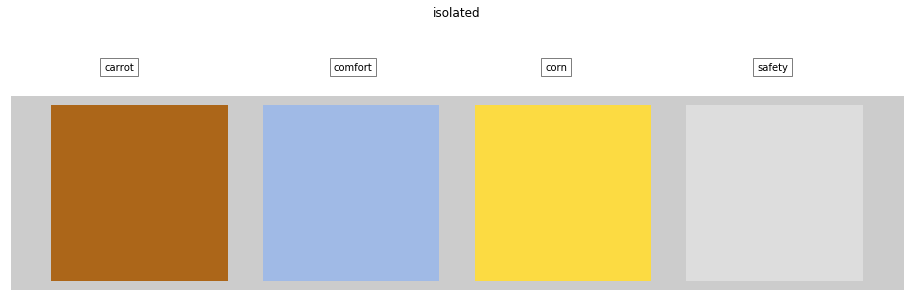

{'carrot': '#ac6619', 'comfort': '#a0bae6', 'corn': '#fcdb42', 'safety': '#dddddd'}


In [219]:
display_ai1(p8,method='isolated')
#display_ai2(cluster_4)

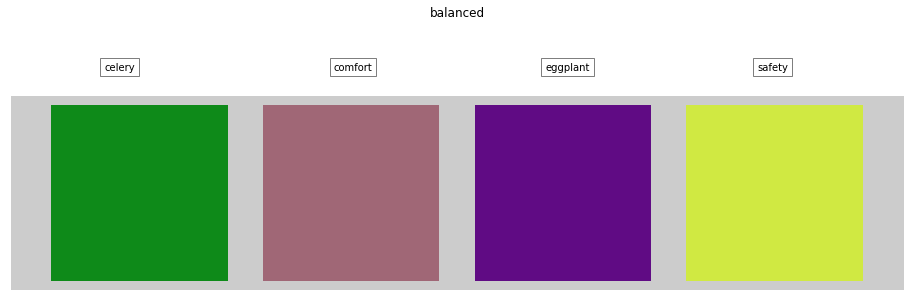

{'celery': '#0e8a19', 'comfort': '#a06776', 'eggplant': '#600b84', 'safety': '#d0e942'}


In [217]:
display_ai1(p8)
#display_ai2(cluster_4)

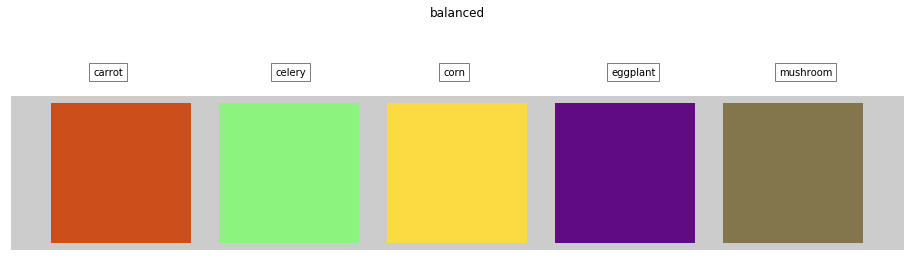

{'carrot': '#cc4f1b', 'celery': '#8cf47e', 'corn': '#fcdb42', 'eggplant': '#600b84', 'mushroom': '#83764c'}


In [181]:
display_ai1(cluster_4)

In [38]:
### OLD DISPLAY FUNC DONT REMOVE


# def display_ai(d = d,concepts=cluster_1, method='isolated', title='', show=True, save_fig=False):
#     plt.rc('font', size=35)   
#     ds = d[d.concept.isin(concepts)]
#     dsa = np.array(ds.loc[:, ds.columns != 'concept'])
#     soln = assignment_solve(dsa, method=method) 
#     fig=plt.figure(figsize=(16,8))
#     rectangle1 = plt.Rectangle((10, 10), 10, 10, fc=color_dict[color_dict.ind==soln[0]+1].hex.values[0])
#     rectangle2 = plt.Rectangle((22, 10), 10, 10, fc=color_dict[color_dict.ind==soln[1]+1].hex.values[0])
#     rectangle3 = plt.Rectangle((34, 10), 10, 10, fc=color_dict[color_dict.ind==soln[2]+1].hex.values[0])
#     rectangle4 = plt.Rectangle((46, 10), 10, 10, fc=color_dict[color_dict.ind==soln[3]+1].hex.values[0])

#     plt.gca().add_patch(rectangle1)
#     plt.gca().add_patch(rectangle2)
#     plt.gca().add_patch(rectangle3)
#     plt.gca().add_patch(rectangle4)
#     plt.gca().axes.get_xaxis().set_ticks([])
#     plt.gca().axes.get_yaxis().set_ticks([])
#     plt.gca().spines['top'].set_visible(False)
#     plt.gca().spines['right'].set_visible(False)
#     plt.gca().spines['bottom'].set_visible(False)
#     plt.gca().spines['left'].set_visible(False)
#     plt.text(13, 22, ds.concept.iloc[0], bbox=dict(facecolor='w', alpha=0.5))
#     plt.text(26, 22, ds.concept.iloc[1], bbox=dict(facecolor='w', alpha=0.5))
#     plt.text(38, 22, ds.concept.iloc[2], bbox=dict(facecolor='w', alpha=0.5))
#     plt.text(50, 22, ds.concept.iloc[3], bbox=dict(facecolor='w', alpha=0.5))

#     if title:
#         plt.title(title, pad=75)
#     ax = fig.add_subplot(1, 1, 1)
#     #ax.set_title('Vertically offset title', pad=40)
#     ax.set_facecolor((0.8, 0.8, 0.8))
#     plt.axis('scaled')
#     if show==True:
#         plt.show()
#     return(ax.get_figure(), soln)
#     if save_fig:
#         plt.savefig('_{}'.format(method), format='pdf')

In [101]:
cluster_4

['carrot', 'celery', 'corn', 'eggplant', 'mushroom']

In [102]:
class Calculator:
    def compute(w, x, y, z=3):
        return(w,x,y,z)
        #return w+y*z

calc = Calculator()
calc.compute(7, 4, 5)

(<__main__.Calculator at 0x11ae95d90>, 7, 4, 5)

In [ ]:
display_ai(d,cluster_2,'isolated')

In [ ]:
display_ai(d,cluster_2,'balanced')

In [ ]:
display_ai(d,cluster_3,'isolated')

In [ ]:
display_ai(d,cluster_3,'balanced')

In [ ]:
display_ai(d,cluster_4,'isolated')

In [ ]:
display_ai(d,cluster_4,'balanced')

In [94]:
bad

NameError: name 'bad_col_inds' is not defined

In [ ]:
display_ai(d,cluster_5,'isolated')

### Reconstructing with <30 PCs

Try with one cluster

In [ ]:
#../data/
rmat = pd.read_csv('ratings_matrix_11PC.csv')
rmat =rmat.drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})

In [ ]:
display_ai(d = rmat, concepts=cluster_2, method='balanced')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_2, method='balanced',title='Number of Components: {}'.format(i))
    


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_1, method='isolated',title='Number of Components:{}'.format(i))
    

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,31):
    rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i))
    rmat = rmat.drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_2, method='balanced',title='Number of Components:{}'.format(i))

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,31):
    rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i))
    rmat = rmat.drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    fig,soln = display_ai(d = rmat, concepts=cluster_4, method='balanced',title='Number of Components:{}'.format(i))
    print(soln)
    fig.savefig('{}_{}PC.pdf'.format('cluster4',i), format = 'pdf',bbox_inches=None, pad_inches=0, transparent=True)

In [ ]:
8*3*16

In [ ]:
rmat29 = pd.read_csv('ratings_matrix_{}PC.csv'.format(29)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})


In [ ]:
rmat29

In [ ]:
rmat29 = pd.read_csv('ratings_matrix_{}PC.csv'.format(29))
rmat29 = rmat29.drop(rmat29.columns[['Unnamed: 0']], axis=1)

In [ ]:
_29mat = pd.read_csv('ratings_matrix_{}PC.csv'.format(29))
_30mat = pd.read_csv('ratings_matrix_{}PC.csv'.format(30))

In [ ]:
_29mat=_29mat.drop(pmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
_30mat = _30mat.drop(pmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})

In [ ]:
_29arr= np.array(_29mat[_29mat.concept == 'sunset'].loc[:,_29mat.columns!='concept'])

In [ ]:
_30arr=np.array(_30mat[_30mat.concept == 'sunset'].loc[:,_30mat.columns!= 'concept'])

In [ ]:
diff= _30arr - _29arr

In [ ]:
np.linalg.norm(diff, 2)

### Clusters (within):

1. Blueberry, Ocean, Beach, Sky
2. Dawn, Day, Happy, Noon
3. Angry, Below, Disgust, Far
4. Field, Lemon, Strawberry, Watermelon

### Clusters (between):

1. Blueberry, Noon, Lemon, Far
2. Beach, Dawn, Strawberry, Angry
3. Ocean, Happy, Watermelon, Disgust
4. Sky, Day, Field, Below

In [ ]:
wcluster1 = ['blueberry', 'ocean', 'beach', 'sky']
wcluster2 = ['dawn', 'day','happy','noon']
wcluster3 = ['angry','below','disgust','far']
wcluster4 = ['field', 'lemon', 'strawberry', 'watermelon']

bcluster1 = ['blueberry', 'noon', 'lemon', 'far']
bcluster2 = ['beach', 'dawn', 'strawberry', 'angry']
bcluster3 = ['ocean', 'happy', 'watermelon', 'disgust']
bcluster4 = ['sky', 'day', 'field', 'below']


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))

solns=[]
for i in range(2,31):
    rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i))
    rmat = rmat.drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    fig,soln = display_ai(d = rmat, show=False, concepts=wcluster4, method='balanced',title='Number of Components:{}'.format(i))
    solns.append(soln)

In [ ]:
len(np.unique(solns, axis=0))

# Palette counts

#### Between cluster

* cluster 1: 9
* cluster 2: 11
* cluster 3: 10
* cluster 4: 7

#### Within cluster

* cluster 1: 11
* cluster 2: 16
* cluster 3: 15
* cluster 4: 18


In [ ]:
solns

10

In [105]:
for i in range(len(a) % 10):
    print(i)
    print(i*10)

In [94]:
sum(a[5:])

277

In [82]:
b = pd.read_json('../data/aidata_bri.json')

In [83]:
c = b[b.trial_type=='assignment-inference']

In [84]:
c = c.reset_index(drop=True)


In [86]:
subject_id=[]
rt=[]
trial_index=[]
label_option=[]
bar_col=[]
answer=[]
response=[]
condition=[]
repetition=[]
category=[]
pal_source=[]
accuracy=[]
total_accuracy=[]
order_num=[]
x=0



for index,row in c.iterrows():
    
    for i in range(5):
        rt.append(row.rt)
        trial_index.append(index)
        label_option.append( eval(row.label_options))
        bar_col.append(eval(row.bar_cols)[i])
        answer.append(eval(row.answer_key)[i])
        response.append( eval(row.label_responses)[i])
        condition.append(row.condition)
        repetition.append(row.repetition)
        category.append(row.category)
        pal_source.append( row.pal_source)
        accuracy.append( eval(row.accuracies)[i])
        total_accuracy.append( row.total_accuracy)
        order_num.append(row.order_num)
        subject_id.append(row.subject_id)
        


In [87]:
pd.DataFrame({'subject_id':subject_id,'trial_index':trial_index,'condition':condition,'pal_source':pal_source,'order_num':order_num,\
               'category':category,'repetition':repetition,'label_option':label_option,'answer':answer,\
               'bar_col':bar_col,'response':response,\
             'accuracy':accuracy,'total_accuracy':total_accuracy,'rt':rt}).to_csv('../cbai_ex.csv')